In [1]:
import detector
import importlib
import data_loader
import pandas as pd
import unet_detector
import seaborn as sn
import xception_freq_detector
import vanilla_pytorch_detector
import matplotlib.pyplot as plt

importlib.reload(detector)
importlib.reload(unet_detector)
importlib.reload(xception_freq_detector)
importlib.reload(vanilla_pytorch_detector)
importlib.reload(data_loader)

%matplotlib inline

In [2]:
detector_class = unet_detector.UNetFreqDetector
#detector_class = unet_detector.UNetSpatialDetector
#detector_class = xception_freq_detector.XceptionFreqDetector

fake_detector = detector_class()

In [3]:
dataset_loader = data_loader.CarDamageDatasetLoader()

train_ds, eval_ds, train_df, eval_df = dataset_loader.load_dataset()
print("Training Dataset Length: " + str(len(train_df)))
print("Evaluation Dataset Length: " + str(len(eval_df)))
print("\nSample Training Dataset:")
display(train_df[:2])

Training Dataset Length: 871
Evaluation Dataset Length: 98

Sample Training Dataset:


,id,image,label
0,/Users/akash/Code/car_images/dataset/fake/imag...,<PIL.Image.Image image mode=RGB size=224x224 a...,Fake
1,/Users/akash/Code/car_images/dataset/fake/imag...,<PIL.Image.Image image mode=RGB size=224x224 a...,Fake


Fake samples


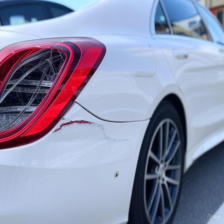

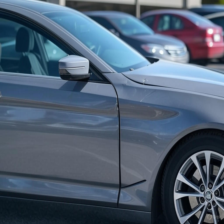

In [4]:
print("Fake samples")
for image in train_df[( train_df["label"] == "Fake")].iloc[:min(2, len(train_df))]["image"]:
    display(image)

Real samples


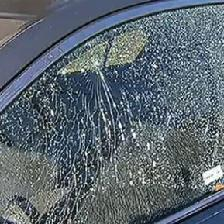

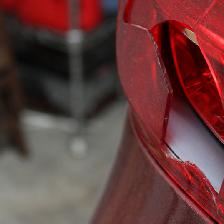

In [5]:
print("Real samples")
for image in train_df[( train_df["label"] == "Real")].iloc[:min(2, len(train_df))]["image"]:
    display(image)

In [6]:
model = fake_detector.get_model()
model

TwoStreamUNetClassifier(
  (spatial_stream): UNet(
    (enc1): UNetBlock(
      (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (enc2): UNetBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (enc3): UNetBlock(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  

In [7]:
epochs = 10
batch_size = 16

fake_detector.train_model(train_ds, eval_ds, epochs, batch_size)
checkpoint_filename = f"{fake_detector.__class__.__name__}_best.pth"

print(f"\nModel trained for {str(epochs)} epochs, best epoch: {epochs}, checkpoint in {checkpoint_filename}")

Epoch 1/10 (Eval):  57%|█████▋    | 4/7 [00:01<00:01,  2.79it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 1/10 (Eval):  71%|███████▏  | 5/7 [00:01<00:00,  2.78it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 1/10 (Eval): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]


Epoch 1/10 Summary:
Train Loss: 0.3793
Eval Loss: 0.2568
Train Metrics: {'accuracy': np.float64(0.8261363636363637), 'precision': np.float64(0.8741722292858657), 'recall': np.float64(0.8261363636363637), 'bad_predictions': np.float64(2.7818181818181817)}
Eval Metrics: {'accuracy': np.float64(0.9107142857142857), 'precision': np.float64(0.9933035714285714), 'recall': np.float64(0.9107142857142857), 'bad_predictions': np.float64(1.4285714285714286)}

New best precision: 0.9933, saving checkpoint to UNetFreqDetector_epoch_1.pth



Epoch 2/10 (Eval):  57%|█████▋    | 4/7 [00:01<00:01,  2.79it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 2/10 (Eval):  71%|███████▏  | 5/7 [00:01<00:00,  2.79it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 2/10 (Eval): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]


Epoch 2/10 Summary:
Train Loss: 0.2173
Eval Loss: 0.0905
Train Metrics: {'accuracy': np.float64(0.9155844155844155), 'precision': np.float64(0.9354116243604881), 'recall': np.float64(0.9155844155844155), 'bad_predictions': np.float64(1.3272727272727274)}
Eval Metrics: {'accuracy': np.float64(0.9732142857142857), 'precision': np.float64(1.0), 'recall': np.float64(0.9732142857142857), 'bad_predictions': np.float64(0.42857142857142855)}

New best precision: 1.0000, saving checkpoint to UNetFreqDetector_epoch_2.pth



Epoch 3/10 (Eval):  14%|█▍        | 1/7 [00:00<00:02,  2.97it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 3/10 (Eval):  29%|██▊       | 2/7 [00:00<00:01,  2.96it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 3/10 (Eval):  71%|███████▏  | 5/7 [00:01<00:00,  2.85it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-

Epoch 3/10 Summary:
Train Loss: 0.1939
Eval Loss: 0.1066
Train Metrics: {'accuracy': np.float64(0.936038961038961), 'precision': np.float64(0.9531705447330447), 'recall': np.float64(0.936038961038961), 'bad_predictions': np.float64(1.0)}
Eval Metrics: {'accuracy': np.float64(0.9732142857142857), 'precision': np.float64(1.0), 'recall': np.float64(0.9732142857142857), 'bad_predictions': np.float64(0.42857142857142855)}



Epoch 4/10 (Eval):  14%|█▍        | 1/7 [00:00<00:02,  2.65it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 4/10 (Eval):  57%|█████▋    | 4/7 [00:01<00:01,  2.55it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 4/10 (Eval):  71%|███████▏  | 5/7 [00:01<00:00,  2.53it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-

Epoch 4/10 Summary:
Train Loss: 0.2186
Eval Loss: 0.1961
Train Metrics: {'accuracy': np.float64(0.9144480519480519), 'precision': np.float64(0.9348716876557787), 'recall': np.float64(0.9144480519480519), 'bad_predictions': np.float64(1.3454545454545455)}
Eval Metrics: {'accuracy': np.float64(0.9375), 'precision': np.float64(1.0), 'recall': np.float64(0.9375), 'bad_predictions': np.float64(1.0)}



Epoch 5/10 (Eval):   0%|          | 0/7 [00:00<?, ?it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 5/10 (Eval):  57%|█████▋    | 4/7 [00:01<00:01,  2.36it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 5/10 (Eval):  71%|███████▏  | 5/7 [00:02<00:00,  2.35it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined 

Epoch 5/10 Summary:
Train Loss: 0.1284
Eval Loss: 0.1984
Train Metrics: {'accuracy': np.float64(0.9545454545454546), 'precision': np.float64(0.9621487193362193), 'recall': np.float64(0.9545454545454546), 'bad_predictions': np.float64(0.7272727272727273)}
Eval Metrics: {'accuracy': np.float64(0.8125), 'precision': np.float64(0.8571428571428571), 'recall': np.float64(0.8125), 'bad_predictions': np.float64(1.0)}



Epoch 6/10 (Eval):  57%|█████▋    | 4/7 [00:01<00:01,  2.02it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 6/10 (Eval):  71%|███████▏  | 5/7 [00:02<00:00,  2.01it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 6/10 (Eval):  86%|████████▌ | 6/7 [00:02<00:00,  2.00it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-

Epoch 6/10 Summary:
Train Loss: 0.1430
Eval Loss: 0.1933
Train Metrics: {'accuracy': np.float64(0.9519480519480519), 'precision': np.float64(0.9635448232323234), 'recall': np.float64(0.9519480519480519), 'bad_predictions': np.float64(0.7454545454545455)}
Eval Metrics: {'accuracy': np.float64(0.8928571428571429), 'precision': np.float64(1.0), 'recall': np.float64(0.8928571428571429), 'bad_predictions': np.float64(0.7142857142857143)}



Epoch 7/10 (Eval):   0%|          | 0/7 [00:00<?, ?it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 7/10 (Eval):  14%|█▍        | 1/7 [00:00<00:02,  2.01it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 7/10 (Eval):  57%|█████▋    | 4/7 [00:02<00:01,  1.96it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined 

Epoch 7/10 Summary:
Train Loss: 0.1307
Eval Loss: 0.0701
Train Metrics: {'accuracy': np.float64(0.9568181818181818), 'precision': np.float64(0.9704053932178932), 'recall': np.float64(0.9568181818181818), 'bad_predictions': np.float64(0.6909090909090909)}
Eval Metrics: {'accuracy': np.float64(0.9553571428571429), 'precision': np.float64(1.0), 'recall': np.float64(0.9553571428571429), 'bad_predictions': np.float64(0.7142857142857143)}



Epoch 8/10 (Eval):  57%|█████▋    | 4/7 [00:02<00:01,  1.74it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 8/10 (Eval):  71%|███████▏  | 5/7 [00:02<00:01,  1.73it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 8/10 (Eval): 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]


Epoch 8/10 Summary:
Train Loss: 0.0829
Eval Loss: 0.0803
Train Metrics: {'accuracy': np.float64(0.9693181818181819), 'precision': np.float64(0.9744620720188902), 'recall': np.float64(0.9693181818181819), 'bad_predictions': np.float64(0.4909090909090909)}
Eval Metrics: {'accuracy': np.float64(0.9732142857142857), 'precision': np.float64(1.0), 'recall': np.float64(0.9732142857142857), 'bad_predictions': np.float64(0.42857142857142855)}



Epoch 9/10 (Eval):   0%|          | 0/7 [00:00<?, ?it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 9/10 (Eval):  71%|███████▏  | 5/7 [00:02<00:01,  2.00it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 9/10 (Eval): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]


Epoch 9/10 Summary:
Train Loss: 0.1034
Eval Loss: 0.0649
Train Metrics: {'accuracy': np.float64(0.9693181818181819), 'precision': np.float64(0.9745280319428047), 'recall': np.float64(0.9693181818181819), 'bad_predictions': np.float64(0.4909090909090909)}
Eval Metrics: {'accuracy': np.float64(0.9732142857142857), 'precision': np.float64(1.0), 'recall': np.float64(0.9732142857142857), 'bad_predictions': np.float64(0.42857142857142855)}



Epoch 10/10 (Eval):  57%|█████▋    | 4/7 [00:02<00:01,  1.87it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 10/10 (Eval):  71%|███████▏  | 5/7 [00:02<00:01,  1.84it/s]/opt/miniconda3/envs/car_images/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
Epoch 10/10 (Eval): 100%|██████████| 7/7 [00:03<00:00,  2.18it/s]


Epoch 10/10 Summary:
Train Loss: 0.1207
Eval Loss: 0.0830
Train Metrics: {'accuracy': np.float64(0.9501623376623376), 'precision': np.float64(0.9671911075036075), 'recall': np.float64(0.9501623376623376), 'bad_predictions': np.float64(0.7272727272727273)}
Eval Metrics: {'accuracy': np.float64(0.9642857142857143), 'precision': np.float64(1.0), 'recall': np.float64(0.9642857142857143), 'bad_predictions': np.float64(0.5714285714285714)}


Best precision: 1.0000, at epoch 2, loading checkpoint from: UNetFreqDetector_epoch_2.pth


Model trained for 10 epochs, best epoch: 10, checkpoint in UNetFreqDetector_best.pth


In [8]:
fake_detector.save_checkpoint(checkpoint_filename)
print(f"Saved model to {checkpoint_filename}")

Saved model to UNetFreqDetector_best.pth


In [9]:
eval_detector = detector_class()
eval_detector.get_model()
eval_detector.load_checkpoint(checkpoint_filename)

Accuracy:		93.88
Bad Predictions:	0/98
{}


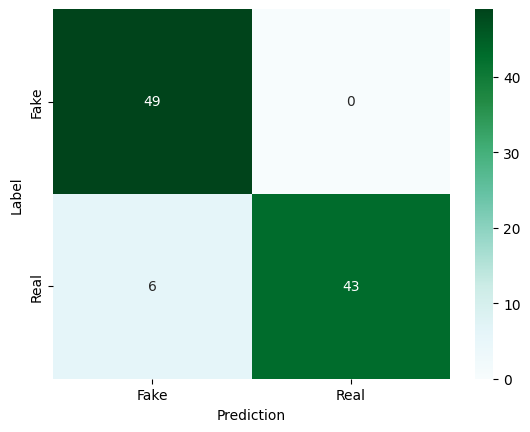

,Fake,Real
Fake,49,0
Real,6,43


,label,precision,recall
0,Fake,1.000000,0.890909
1,Real,0.877551,1.000000


In [10]:
y_true, y_pred, images, df_cm, df_metrics, accuracy, bad_prediction_count, bad_predictions = eval_detector.evaluate_model(eval_ds)
df_results = pd.DataFrame(zip(y_true, y_pred, images), columns=["Label", "Prediction", "Image"])

print(f"Accuracy:\t\t{accuracy:.2f}")
print(f"Bad Predictions:\t{bad_prediction_count}/{len(y_true)}")
print(bad_predictions)

plt.figure()
sn.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()
display(df_cm)

display(df_metrics)

In [11]:
def display_sample_failures(df, label, prediction):
    images = df[(df["Label"] == label) & (df["Prediction"] == prediction)]["Image"]
    print(f"Found {len(images)} samples with label '{label}' and prediction '{prediction}'")

    for i in range(min(5, len(images))):
        display(images.iloc[i])


display_sample_failures(df_results, label="Fake", prediction="Real")

Found 0 samples with label 'Fake' and prediction 'Real'
